# Carga y Exploración del Conjunto de Datos

## Carga de un conjunto de datos en un DataFrame utilizando pandas


Los datos a validar se toman desde el dataset ofrecido por datos.gov.co.

El data set es sobre los [Resultados únicos Saber 11](https://www.datos.gov.co/Educaci-n/Resultados-nicos-Saber-11/kgxf-xxbe/about_data), la cual es suministrada y actualizada cada semestre por el **Instituto colombiano para la evaluación de la educación**.

>Los datos cargados quedan en la variable **results_df**, la cual se usará en procesos posteriores


In [ ]:
# Instalación de dependencias necesarias para el uso de la API de Socrata
!pip install sodapy

import os
import pandas as pd
from sodapy import Socrata
from google.colab import userdata

# Obtener el App Token de manera segura desde Google Colab
APP_TOKEN = userdata.get('APP_TOKEN')

# Conectar con la API de Datos Abiertos de Colombia
client = Socrata(
    "www.datos.gov.co",  # URL del portal de datos abiertos
    APP_TOKEN            # Token para autenticación

In [ ]:
# Obtener los datos utilizando la API
# Filtrar por el periodo '20221' (primer semestre de 2022)
# Límite de 100,000 registros para un manejo eficiente
results = client.get("kgxf-xxbe", where="periodo='20221'", limit=100000)

# Convertir los resultados a un DataFrame de pandas para su análisis
results_df = pd.DataFrame.from_records(results)

## Cantidad de columnas y filas

In [ ]:
# Visualizar las dimensiones del DataFrame
print("El DataFrame tiene: \n")
print(f"- Filas: {results_df.shape[0]}")
print(f"- Columnas: {results_df.shape[1]}")

El DataFrame tiene: 

- Filas: 20049
- Columnas: 51


# Tipos de Datos

Los tipos de datos son:
*   **int64:** Enteros.
*   **float64:** Números de punto flotante.
*   **object:** Generalmente representa texto (strings).
*   **datetime64[ns]:** Fechas y horas.
*   **bool:** Valores booleanos (True/False).

In [ ]:
print(results_df.dtypes)

periodo                          object
estu_tipodocumento               object
estu_consecutivo                 object
cole_area_ubicacion              object
cole_bilingue                    object
cole_calendario                  object
cole_caracter                    object
cole_cod_dane_establecimiento    object
cole_cod_dane_sede               object
cole_cod_depto_ubicacion         object
cole_cod_mcpio_ubicacion         object
cole_codigo_icfes                object
cole_depto_ubicacion             object
cole_genero                      object
cole_jornada                     object
cole_mcpio_ubicacion             object
cole_naturaleza                  object
cole_nombre_establecimiento      object
cole_nombre_sede                 object
cole_sede_principal              object
estu_cod_depto_presentacion      object
estu_cod_mcpio_presentacion      object
estu_cod_reside_depto            object
estu_cod_reside_mcpio            object
estu_depto_presentacion          object


# Cantidad de Datos Faltantes

In [ ]:
# Número de columnas con al menos un dato faltante
num_cols_with_missing = results_df.isna().any().sum()

# Detectar cantidad de datos faltantes
missing_data = results_df.isnull().sum()

# Mostrar datos
print(f"""
Cantidad de columnas con datos faltantes: {num_cols_with_missing}

Valores nulos por columna:

{results_df.isnull().sum().sort_values(ascending=False)}""")


Cantidad de columnas con datos faltantes: 17

Valores nulos por columna:

cole_bilingue                    4903
cole_caracter                    2420
fami_estratovivienda             1049
fami_tieneinternet                953
fami_educacionmadre               943
fami_educacionpadre               938
fami_tieneautomovil               851
fami_tienelavadora                805
fami_tienecomputador              802
fami_cuartoshogar                 793
fami_personashogar                769
punt_ingles                       104
desemp_ingles                     104
estu_mcpio_reside                   7
estu_cod_reside_mcpio               7
estu_cod_reside_depto               7
estu_depto_reside                   7
estu_fechanacimiento                0
punt_matematicas                    0
estu_privado_libertad               0
estu_pais_reside                    0
estu_nacionalidad                   0
punt_sociales_ciudadanas            0
punt_c_naturales                    0
punt_lectura_

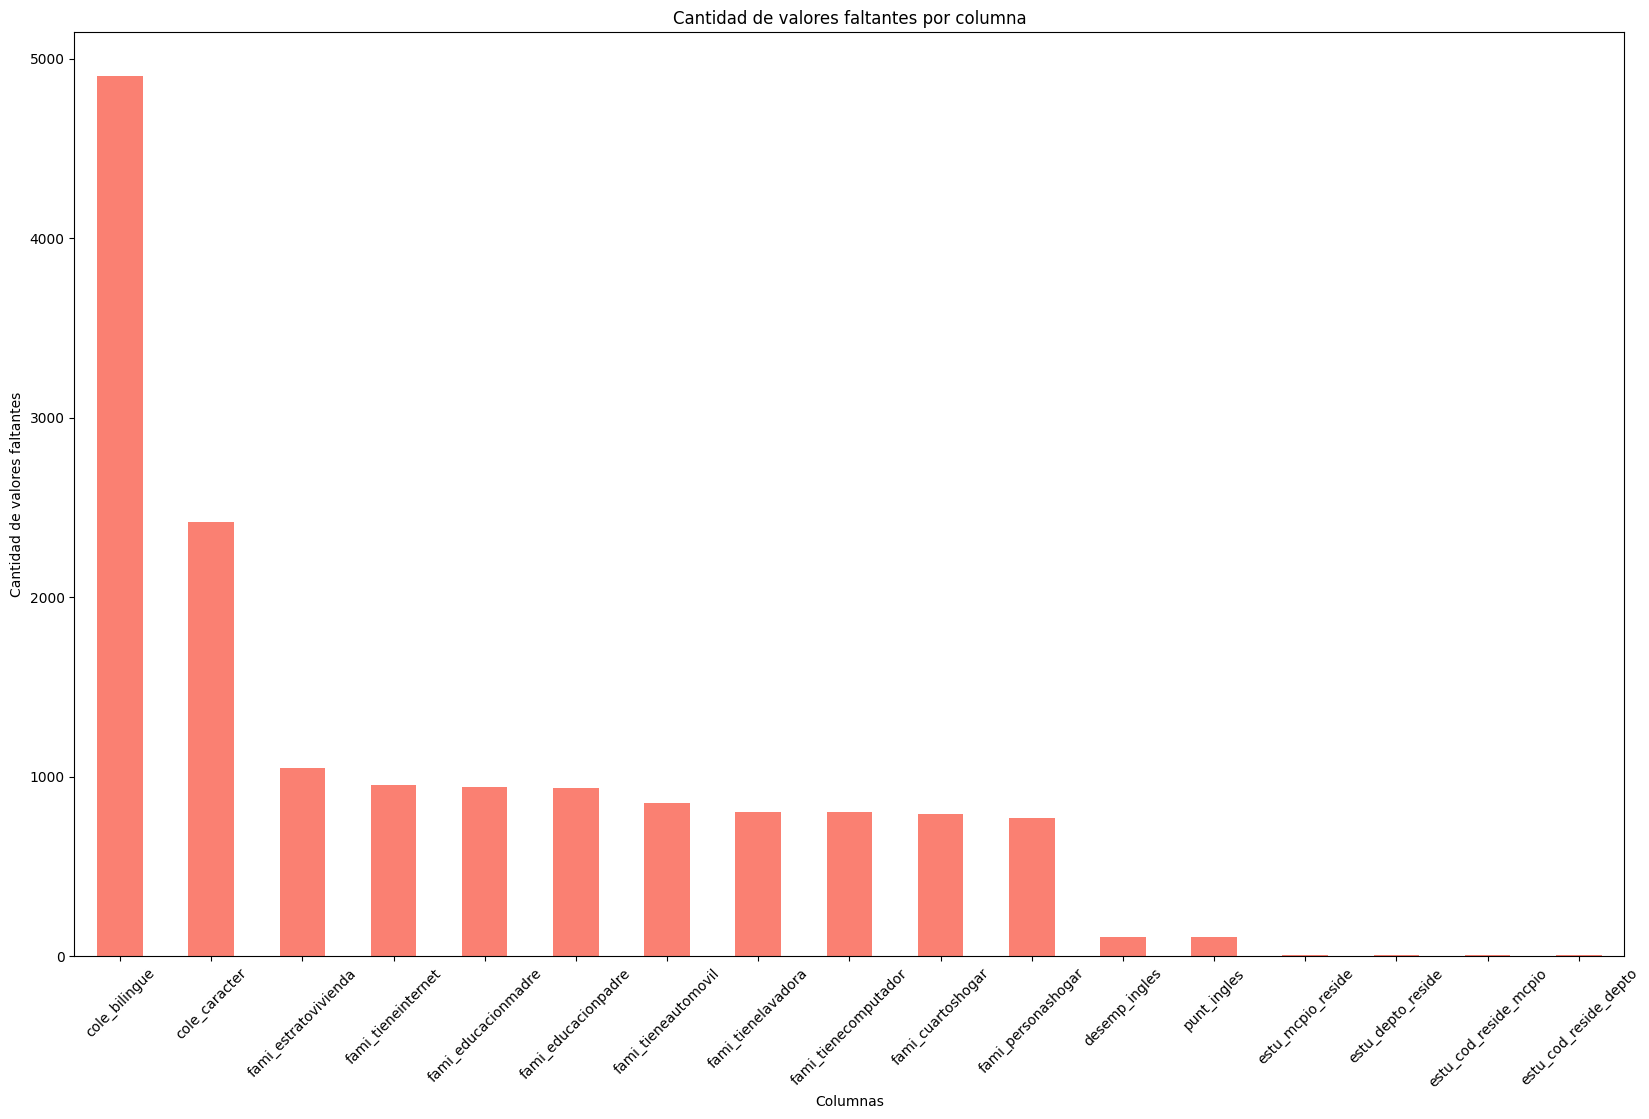

In [ ]:
import matplotlib.pyplot as plt

missing_data = results_df.isna().sum()

# Crear gráfico de barras
plt.figure(figsize=(20, 12))
missing_data[missing_data > 0].sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title("Cantidad de valores faltantes por columna")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de valores faltantes")
plt.xticks(rotation=45)
plt.show()

Los datos faltantes impactan cada fase del ciclo de vida del modelo de machine learning. Si no se manejan adecuadamente, puede:
* Llevar a modelos sesgados
* Métricas engañosas
* Bajo desempeño en producción

Afecta en
1. Problemas Durante el Preprocesamiento
  * Pérdida de Información
  * Riesgo de Distorsión

2. Dificultades en la Ingeniería de Características
  * Reducción de Variabilidad
  * Interacciones Perdidas

3. Impacto en el Entrenamiento del Modelo
  * Entrenamiento Incompleto
  * Efecto en Modelos Basados en Estadísticas

4. Problemas en la Evaluación del Modelo
  * Evaluaciones Inexactas
  * Simulación Irreal

5. Desafíos en el Despliegue y Uso en Producción
  * Datos Reales Faltantes
  * Impacto en Decisiones Críticas

Mitigación
  * Entender el Origen
  * Evaluar el Patrón de los Datos Faltantes
  * Eliminar Datos con Cuidado
  * Usar Modelos que Manejen Datos Faltantes (árboles de decisión y bosques aleatorios)


# Verificación de Reglas de Rango y Dominio

In [ ]:
# Ejemplo de limpiar datos: valores erróneos

# Lista de tipos de documentos válidos
tipos_validos = ["RC", "TI", "CC", "TE", "CE", "NIT", "PP", "PEP", "DIE"]

# Identificar valores inválidos
results_df["tipodocumento"] = results_df["estu_tipodocumento"].isin(tipos_validos)

print(f"""Valores inválidos:
{results_df[results_df["tipodocumento"] == False]}""")

# Manejo de valores inválidos
results_df["estu_tipodocumento"] = results_df["estu_tipodocumento"].where(results_df["tipodocumento"], "Desconocido")

print(f"""Valores válidos:
{results_df["estu_tipodocumento"]}""")

Valores inválidos:
      periodo estu_tipodocumento estu_consecutivo cole_area_ubicacion  \
89      20221        Desconocido   AC202210027298               RURAL   
325     20221        Desconocido   AC202210037033              URBANO   
382     20221        Desconocido   AC202210020273              URBANO   
454     20221        Desconocido   AC202210013402              URBANO   
465     20221        Desconocido   AC202210027704               RURAL   
...       ...                ...              ...                 ...   
19212   20221        Desconocido   AC202210009145              URBANO   
19272   20221        Desconocido   AC202210007763               RURAL   
19359   20221        Desconocido   AC202210033268              URBANO   
19501   20221        Desconocido   AC202210035466              URBANO   
19870   20221        Desconocido   AC202210033609               RURAL   

      cole_bilingue cole_calendario cole_caracter cole_depto_ubicacion  \
89                S           

In [ ]:
# Ejemplo de datos irrelevantes: lista de prefijos clave para filtar columnas
prefijo_col = ["cole_cod_", "cole_codigo", "estu_cod", "cole_sede_principal"]

# Identificar columnas para eliminar según prefijos
drop_columns = [col for col in results_df.columns if col.startswith(tuple(prefijo_col))]

# Eliminar columnas
results_df = results_df.drop(columns=drop_columns)

# Validación de filas y columnas
rows, columns = results_df.shape
print(f"Filas: {rows}, Columnas: {columns}")

Filas: 20049, Columnas: 42


# Dimensiones de la Calidad de Datos

In [ ]:
# Completitud de los datos: validación de datos incompletos
completitud = results_df.isnull().sum().to_frame(name="Valores nulos")
completitud["Porcentaje"] = (completitud["Valores nulos"] / len(results_df)) * 100
print(completitud)

                             Valores nulos  Porcentaje
periodo                                  0    0.000000
estu_tipodocumento                       0    0.000000
estu_consecutivo                         0    0.000000
cole_area_ubicacion                      0    0.000000
cole_bilingue                         4903   24.455085
cole_calendario                          0    0.000000
cole_caracter                         2420   12.070427
cole_depto_ubicacion                     0    0.000000
cole_genero                              0    0.000000
cole_jornada                             0    0.000000
cole_mcpio_ubicacion                     0    0.000000
cole_naturaleza                          0    0.000000
cole_nombre_establecimiento              0    0.000000
cole_nombre_sede                         0    0.000000
estu_depto_presentacion                  0    0.000000
estu_depto_reside                        7    0.034914
estu_estadoinvestigacion                 0    0.000000
estu_estud

In [ ]:
# Consistencia de los datos: convertir al tipo de dato correcto
print(results_df["estu_fechanacimiento"].head())
results_df["estu_fechanacimiento"] = pd.to_datetime(results_df["estu_fechanacimiento"], errors='coerce')

0    16/09/2003
1    17/11/2003
2    26/10/2005
3    05/05/2004
4    18/06/2005
Name: estu_fechanacimiento, dtype: object


<ipython-input-13-a12213f1058e>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  results_df["estu_fechanacimiento"] = pd.to_datetime(results_df["estu_fechanacimiento"], errors='coerce')


In [ ]:

# Exactitud de los datos: datos inválidos
print(f"""Cantidad de fechas inválidas: {results_df["estu_fechanacimiento"].isna().sum()}""")

Cantidad de fechas inválidas: 10


# Detección y Tratamiento de Datos Ausentes

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler

numeric_cols = ['punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas',
                'punt_c_naturales', 'punt_lectura_critica', 'punt_global']
numeric_data = results_df[numeric_cols].copy()

for col in numeric_cols:
    numeric_data[col] = pd.to_numeric(numeric_data[col], errors='coerce')

# Visualizar una columna antes y después del escalado
col = 'punt_matematicas'

# Obtener filas que tienen datos faltantes
rows_with_missing = numeric_data[numeric_data.isna().any(axis=1)]
missing_indices = rows_with_missing.index

# Verificar tipos de datos
print(numeric_data.dtypes)

punt_ingles                 float64
punt_matematicas              int64
punt_sociales_ciudadanas      int64
punt_c_naturales              int64
punt_lectura_critica          int64
punt_global                   int64
dtype: object


Datos faltantes a los que se desea imputar datos

In [ ]:
print("\nDatos originales:")
print(numeric_data.iloc[missing_indices])


Datos originales:
       punt_ingles  punt_matematicas  punt_sociales_ciudadanas  \
14             NaN                70                        69   
193            NaN                62                        48   
214            NaN                26                        35   
310            NaN                56                        54   
747            NaN                39                        37   
...            ...               ...                       ...   
19199          NaN                53                        47   
19258          NaN                33                        30   
19515          NaN                40                        45   
19883          NaN                50                        41   
20004          NaN                45                        44   

       punt_c_naturales  punt_lectura_critica  punt_global  
14                   68                    72          349  
193                  64                    70          305  
214  

**Imputación con la Media**

In [ ]:
df_mean_imputed = numeric_data.copy()
df_mean_imputed = df_mean_imputed.fillna(numeric_data.mean())

print(df_mean_imputed.iloc[missing_indices])

       punt_ingles  punt_matematicas  punt_sociales_ciudadanas  \
14       63.174279                70                        69   
193      63.174279                62                        48   
214      63.174279                26                        35   
310      63.174279                56                        54   
747      63.174279                39                        37   
...            ...               ...                       ...   
19199    63.174279                53                        47   
19258    63.174279                33                        30   
19515    63.174279                40                        45   
19883    63.174279                50                        41   
20004    63.174279                45                        44   

       punt_c_naturales  punt_lectura_critica  punt_global  
14                   68                    72          349  
193                  64                    70          305  
214                  33 

**Imputación con la Mediana**

In [ ]:
df_median_imputed = numeric_data.copy()
df_median_imputed = df_median_imputed.fillna(numeric_data.median())

print(df_median_imputed.iloc[missing_indices])

       punt_ingles  punt_matematicas  punt_sociales_ciudadanas  \
14            64.0                70                        69   
193           64.0                62                        48   
214           64.0                26                        35   
310           64.0                56                        54   
747           64.0                39                        37   
...            ...               ...                       ...   
19199         64.0                53                        47   
19258         64.0                33                        30   
19515         64.0                40                        45   
19883         64.0                50                        41   
20004         64.0                45                        44   

       punt_c_naturales  punt_lectura_critica  punt_global  
14                   68                    72          349  
193                  64                    70          305  
214                  33 

**Imputación Mediante Regresión**

In [ ]:
from sklearn.linear_model import LinearRegression

df_regression = numeric_data.copy()

# Identificar las filas con valores faltantes en col3
missing = df_regression['punt_ingles'].isna()

# Usar col1 y col2 como variables independientes
X_train = df_regression.loc[~missing, ['punt_matematicas', 'punt_sociales_ciudadanas']].fillna(0)
y_train = df_regression.loc[~missing, 'punt_ingles']

X_missing = df_regression.loc[missing, ['punt_matematicas', 'punt_sociales_ciudadanas']].fillna(0)

# Entrenar el modelo de regresión
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los valores faltantes
df_regression.loc[missing, 'punt_ingles'] = model.predict(X_missing)

print("\nImputación mediante Regresión:")
print(df_regression)



Imputación mediante Regresión:
       punt_ingles  punt_matematicas  punt_sociales_ciudadanas  \
0             54.0                47                        64   
1             80.0                54                        57   
2             75.0                58                        60   
3             52.0                31                        25   
4             83.0                60                        60   
...            ...               ...                       ...   
20044         76.0                55                        54   
20045         48.0                53                        38   
20046         73.0                67                        57   
20047         38.0                35                        35   
20048         49.0                56                        53   

       punt_c_naturales  punt_lectura_critica  punt_global  
0                    51                    66          284  
1                    50                    63        

**Imputación con Hot Deck**

El enfoque de Hot Deck Imputation sustituye los valores faltantes por valores tomados de observaciones similares (filas con datos completos).

In [ ]:
from sklearn.impute import KNNImputer

# Usar KNN para imputar valores
imputer = KNNImputer(n_neighbors=2)
df_hot_deck_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

print(df_hot_deck_imputed)

       punt_ingles  punt_matematicas  punt_sociales_ciudadanas  \
0             54.0              47.0                      64.0   
1             80.0              54.0                      57.0   
2             75.0              58.0                      60.0   
3             52.0              31.0                      25.0   
4             83.0              60.0                      60.0   
...            ...               ...                       ...   
20044         76.0              55.0                      54.0   
20045         48.0              53.0                      38.0   
20046         73.0              67.0                      57.0   
20047         38.0              35.0                      35.0   
20048         49.0              56.0                      53.0   

       punt_c_naturales  punt_lectura_critica  punt_global  
0                  51.0                  66.0        284.0  
1                  50.0                  63.0        289.0  
2                  54.0 

# Normalización de Datos

Normalizar datos

In [ ]:
# Min-Max Scaling
scaler_minmax = MinMaxScaler()
scaled_minmax = scaler_minmax.fit_transform(numeric_data)
scaled_minmax_df = pd.DataFrame(scaled_minmax, columns=numeric_cols)

# Robust Scaling
scaler_robust = RobustScaler()
scaled_robust = scaler_robust.fit_transform(numeric_data)
scaled_robust_df = pd.DataFrame(scaled_robust, columns=numeric_cols)

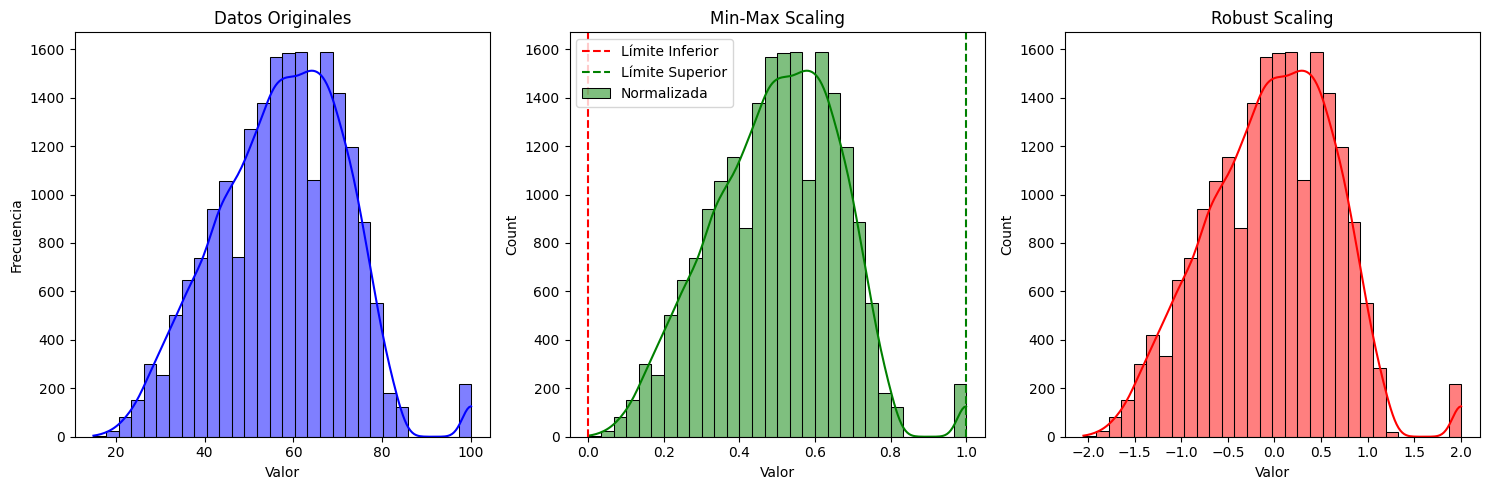

In [ ]:
import seaborn as sns

# Gráficos en subplots
plt.figure(figsize=(15, 5))

# Datos originales
plt.subplot(1, 3, 1)
sns.histplot(numeric_data[col], kde=True, color='blue', bins=30)
plt.title("Datos Originales")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

# Min-Max Scaling
plt.subplot(1, 3, 2)
sns.histplot(scaled_minmax_df[col], kde=True, color='green', bins=30, label="Normalizada")
plt.axvline(0, color='red', linestyle='--', label='Límite Inferior')
plt.axvline(1, color='green', linestyle='--', label='Límite Superior')
plt.title("Min-Max Scaling")
plt.xlabel("Valor")
plt.legend()

# Robust Scaling
plt.subplot(1, 3, 3)
sns.histplot(scaled_robust_df[col], kde=True, color='red', bins=30)
plt.title("Robust Scaling")
plt.xlabel("Valor")

plt.tight_layout()
plt.show()

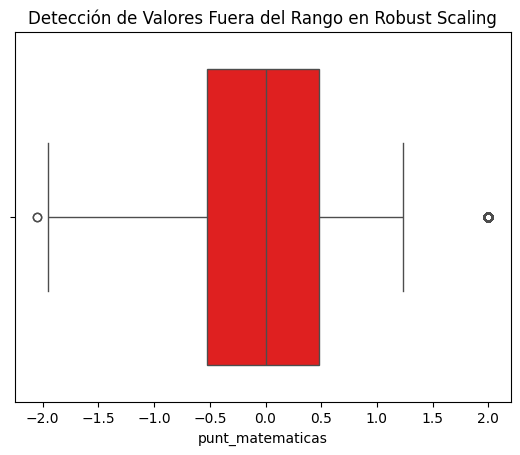

In [ ]:
sns.boxplot(x=scaled_robust_df[col], color='red')
plt.title("Detección de Valores Fuera del Rango en Robust Scaling")
plt.show()

# Análisis Univariable

Histograma

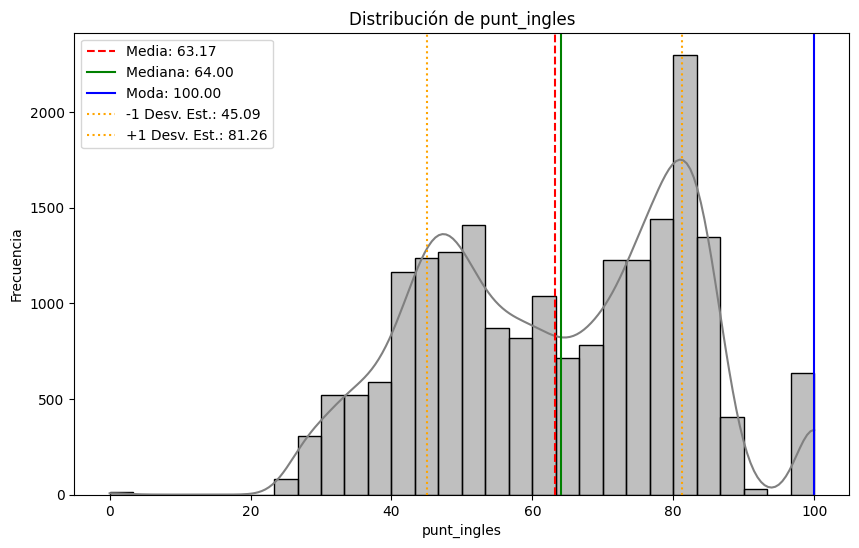

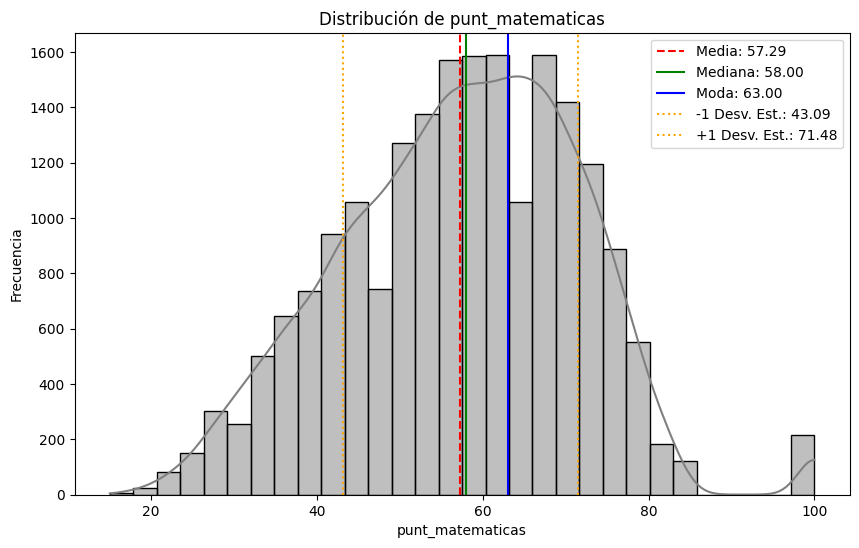

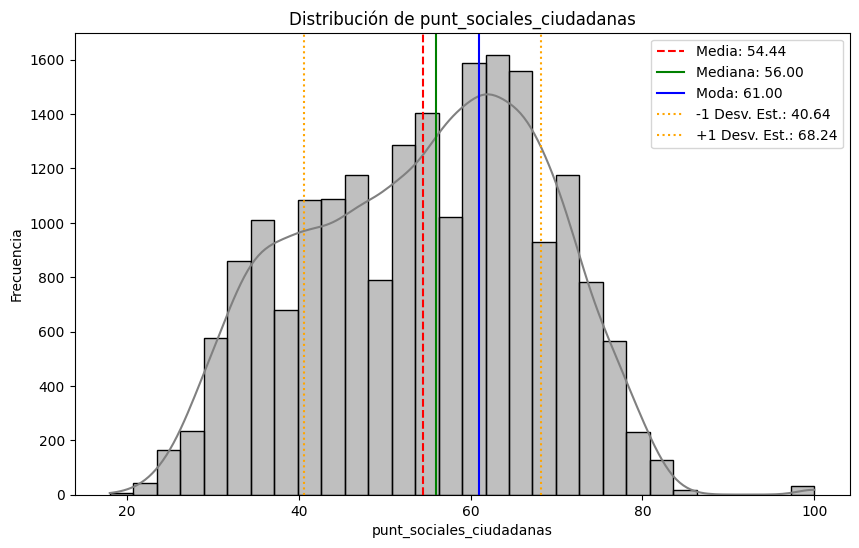

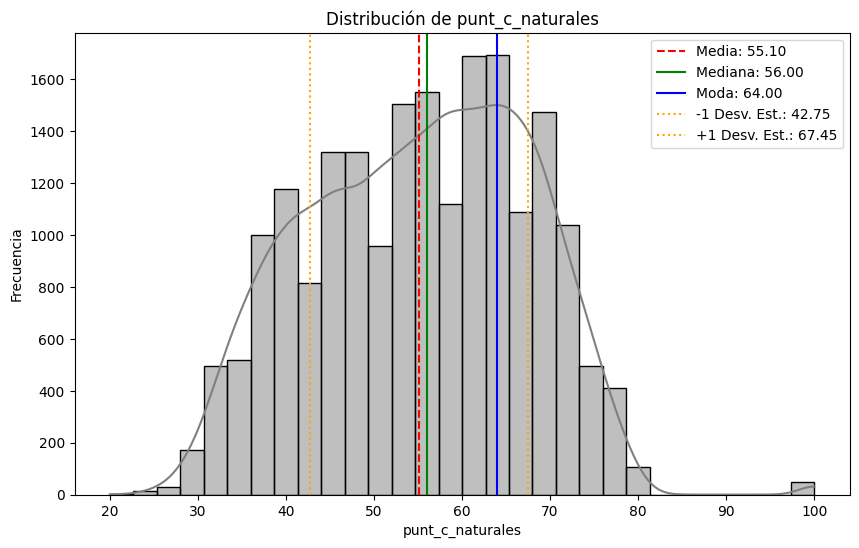

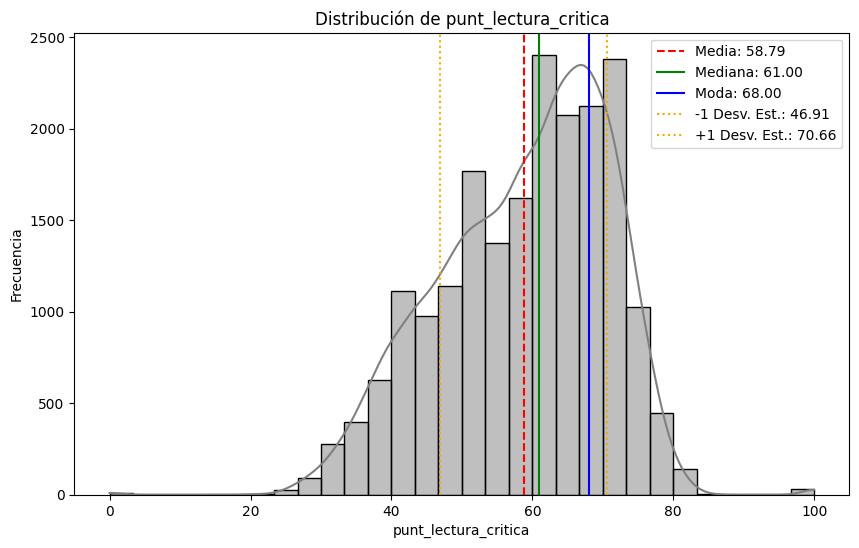

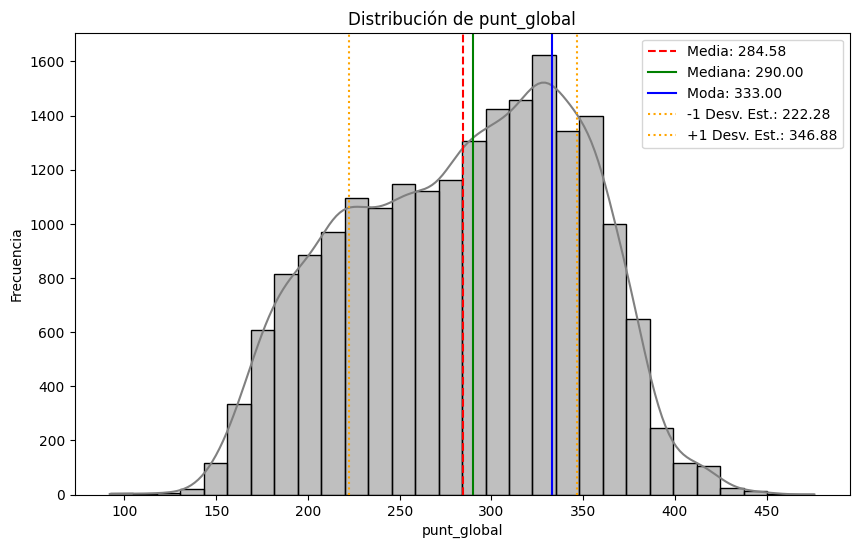

In [ ]:
import seaborn as sns

for col in numeric_cols:
    mean = numeric_data[col].mean()
    median = numeric_data[col].median()
    mode_value = numeric_data[col].mode().values[0]
    std_dev = numeric_data[col].std()

    plt.figure(figsize=(10, 6))
    sns.histplot(numeric_data[col], kde=True, color='gray', bins=30)

    plt.axvline(mean, color='red', linestyle='--', label=f'Media: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='-', label=f'Mediana: {median:.2f}')
    plt.axvline(mode_value, color='blue', linestyle='-', label=f'Moda: {mode_value:.2f}')
    plt.axvline(mean - std_dev, color='orange', linestyle=':', label=f'-1 Desv. Est.: {mean - std_dev:.2f}')
    plt.axvline(mean + std_dev, color='orange', linestyle=':', label=f'+1 Desv. Est.: {mean + std_dev:.2f}')

    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

In [ ]:
import pandas as pd

df = pd.DataFrame(numeric_data)

# Cálculo de estadísticas descriptivas
for col in df.columns:
    print(f"\nEstadísticas para '{col}':")
    print(f"Media: {df[col].mean()}")
    print(f"Mediana: {df[col].median()}")
    print(f"Moda: {df[col].mode().values[0]}")  # Obtener la primera moda
    print(f"Desviación Estándar: {df[col].std()}")



Estadísticas para 'punt_ingles':
Media: 63.17427926798696
Mediana: 64.0
Moda: 100.0
Desviación Estándar: 18.081056361308775

Estadísticas para 'punt_matematicas':
Media: 57.28565015711507
Mediana: 58.0
Moda: 63
Desviación Estándar: 14.19075572203268

Estadísticas para 'punt_sociales_ciudadanas':
Media: 54.44146840241409
Mediana: 56.0
Moda: 61
Desviación Estándar: 13.803347434501333

Estadísticas para 'punt_c_naturales':
Media: 55.09606464162801
Mediana: 56.0
Moda: 64
Desviación Estándar: 12.349216227581715

Estadísticas para 'punt_lectura_critica':
Media: 58.788767519577036
Mediana: 61.0
Moda: 68
Desviación Estándar: 11.8758173374481

Estadísticas para 'punt_global':
Media: 284.5801286847224
Mediana: 290.0
Moda: 333
Desviación Estándar: 62.29852423189409


# Análisis Bivariado

El valor de correlación estará entre -1 y 1

* 1 significa una correlación positiva perfecta.
* -1 significa una correlación negativa perfecta.
* 0 significa ninguna correlación lineal.


En un scatter plot
* Si los puntos están alineados en una línea recta, hay una fuerte correlación lineal.
* Si los puntos están dispersos sin ningún patrón, la correlación será baja o nula.


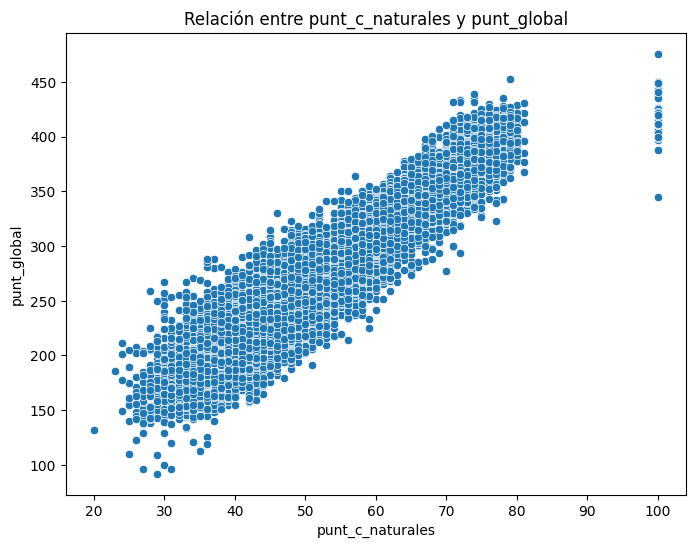

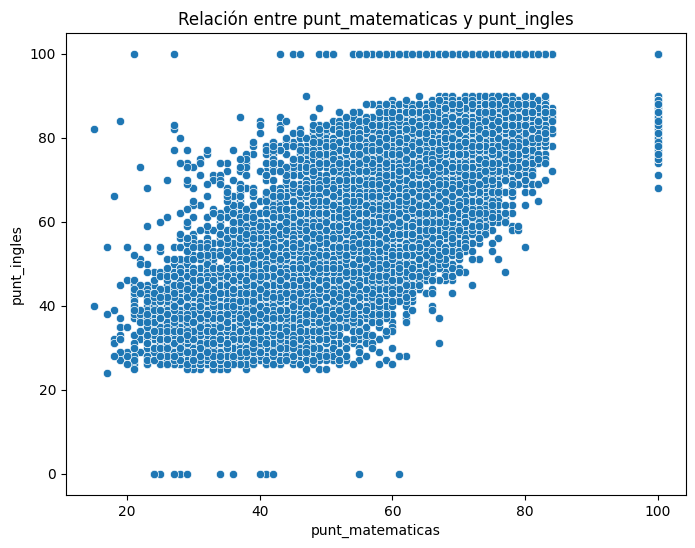

In [ ]:
# COLUMNAS ['punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica', 'punt_global']
# Visualizar la correlación entre col1 y col2 usando un scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='punt_c_naturales', y='punt_global', data=numeric_data)
plt.title("Relación entre punt_c_naturales y punt_global")
plt.xlabel("punt_c_naturales")
plt.ylabel("punt_global")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='punt_matematicas', y='punt_ingles', data=numeric_data)
plt.title("Relación entre punt_matematicas y punt_ingles")
plt.xlabel("punt_matematicas")
plt.ylabel("punt_ingles")
plt.show()

# Análisis Multivariado

Matriz de Correlación:
                          punt_ingles  punt_matematicas  \
punt_ingles                  1.000000          0.774850   
punt_matematicas             0.774850          1.000000   
punt_sociales_ciudadanas     0.765372          0.810289   
punt_c_naturales             0.788487          0.867739   
punt_lectura_critica         0.773198          0.804854   
punt_global                  0.861682          0.932231   

                          punt_sociales_ciudadanas  punt_c_naturales  \
punt_ingles                               0.765372          0.788487   
punt_matematicas                          0.810289          0.867739   
punt_sociales_ciudadanas                  1.000000          0.858406   
punt_c_naturales                          0.858406          1.000000   
punt_lectura_critica                      0.841192          0.827926   
punt_global                               0.935603          0.946559   

                          punt_lectura_critica  punt_globa

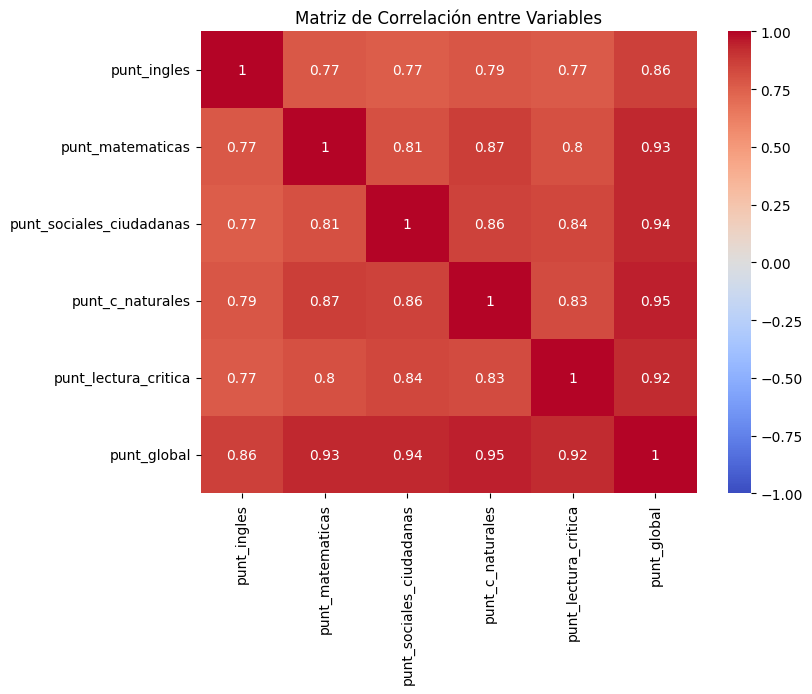

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Mostrar la matriz de correlación
print("Matriz de Correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Variables")
plt.show()

Análisis de Componentes Principales (PCA), los componentes principales (PC1, PC2)

* **PC1** (Primer Componente Principal) es el vector que maximiza la varianza de los datos en la nueva dirección. Es la combinación lineal de las variables originales que captura la mayor parte de la información (varianza) de los datos.
* **PC2** (Segundo Componente Principal) es ortogonal (perpendicular) al primero y captura la mayor parte de la varianza restante que no fue explicada por PC1.

Componentes Principales:
            PC1       PC2
0     -0.101874 -0.623227
1      0.346110  0.828354
2      0.399847  0.497841
3     -3.875557  0.995528
4      1.252642  0.653318
...         ...       ...
20044  0.128973  0.704076
20045 -1.923896 -0.015481
20046  1.150077  0.159185
20047 -3.480444 -0.059108
20048 -0.851119 -0.498149

[20049 rows x 2 columns]

Varianza explicada por cada componente:
[0.87425941 0.04356685]


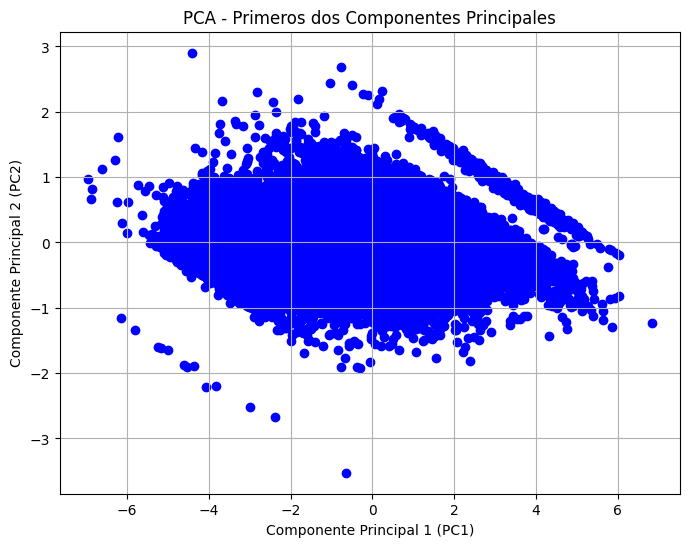

In [ ]:
# COLUMNAS ['punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica', 'punt_global']

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_hot_deck_imputed)

# Crear el objeto PCA y seleccionar el número de componentes principales
pca = PCA(n_components=2)

# Aplicar PCA a los datos normalizados
principal_components = pca.fit_transform(df_scaled)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# Ver los componentes principales
print("Componentes Principales:")
print(pca_df)

# Ver la varianza explicada por cada componente
print("\nVarianza explicada por cada componente:")
print(pca.explained_variance_ratio_)

# Visualizar los primeros dos componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='blue')
plt.title("PCA - Primeros dos Componentes Principales")
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.grid(True)
plt.show()


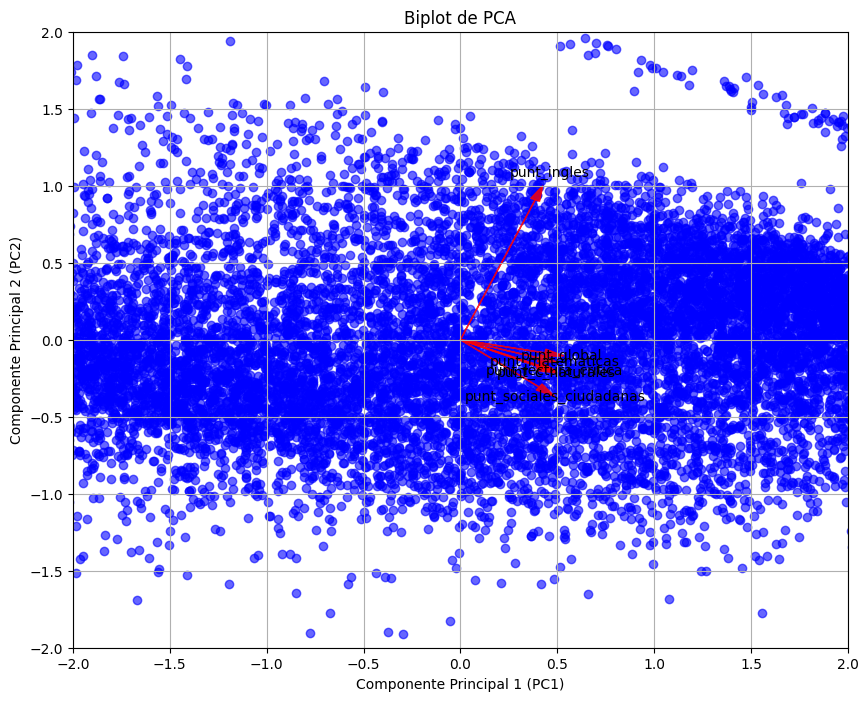

In [ ]:
# Cargar las cargas de las variables (contribución de cada variable a los componentes)
loadings = pca.components_.T  # Transponer para tener las cargas por variable
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=df.columns)

# Crear el gráfico
plt.figure(figsize=(10, 8))

# Dibujar los puntos (proyección de los datos)
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='blue', label='Datos', alpha=0.6)

# Dibujar las cargas de las variables
for i in range(loadings_df.shape[0]):
    plt.arrow(0, 0, loadings_df.iloc[i, 0], loadings_df.iloc[i, 1],
              color='red', alpha=0.8, head_width=0.05, head_length=0.1)
    plt.text(loadings_df.iloc[i, 0] * 1.2, loadings_df.iloc[i, 1] * 1.2,
             df.columns[i], color='black', ha='center', va='center')

# Etiquetas y título
plt.title("Biplot de PCA")
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.grid(True)
plt.xlim(-2, 2)  # Ajuste de límites para mejor visualización
plt.ylim(-2, 2)

plt.show()


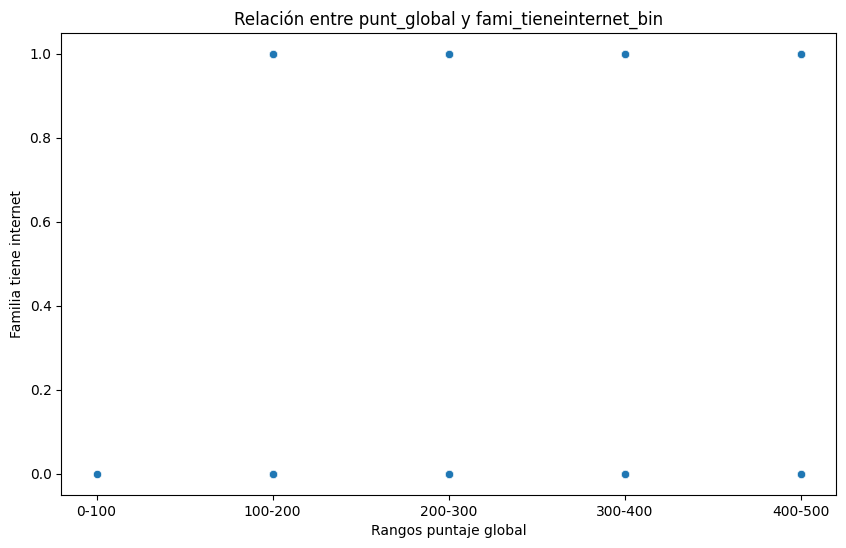

0.3227448187778271


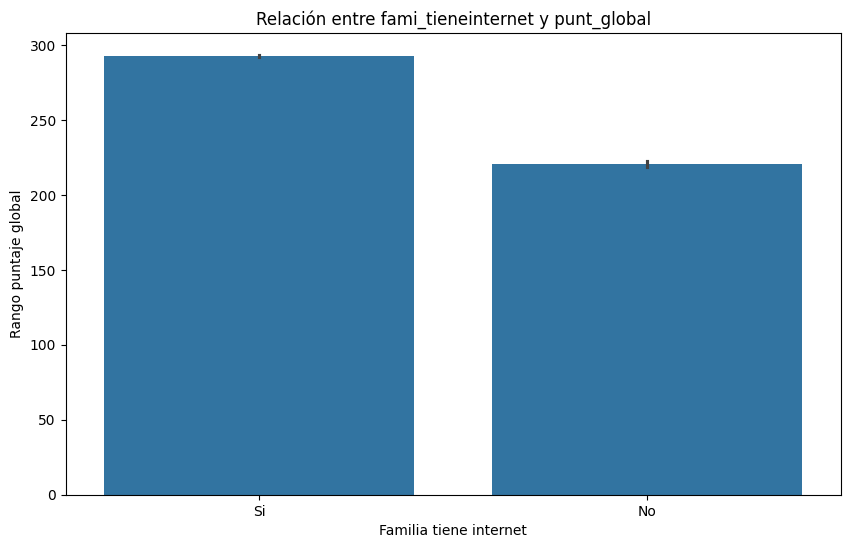

In [ ]:
# Impacto entre el puntaje global y acceso a recursos educativos
import matplotlib.pyplot as plt
import seaborn as sns

results_df['punt_global'] = pd.to_numeric(results_df['punt_global'], errors='coerce')

# Convertir a variable binaria
results_df['fami_tieneinternet_bin'] = results_df['fami_tieneinternet'].map({'Si':1, 'No':0})
bins = [0, 100, 200, 300, 400, 500]
labels = ['0-100', '100-200', '200-300','300-400', '400-500']
results_df['punt_global_bin'] = pd.cut(results_df['punt_global'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='punt_global_bin', y='fami_tieneinternet_bin', data=results_df)
plt.title("Relación entre punt_global y fami_tieneinternet_bin")
plt.xlabel("Rangos puntaje global")
plt.ylabel("Familia tiene internet")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='fami_tieneinternet', y='punt_global', data=results_df)
plt.title("Relación entre fami_tieneinternet y punt_global")
plt.xlabel("Familia tiene internet")
plt.ylabel("Rango puntaje global")


print(results_df['punt_global'].corr(results_df['fami_tieneinternet_bin']))

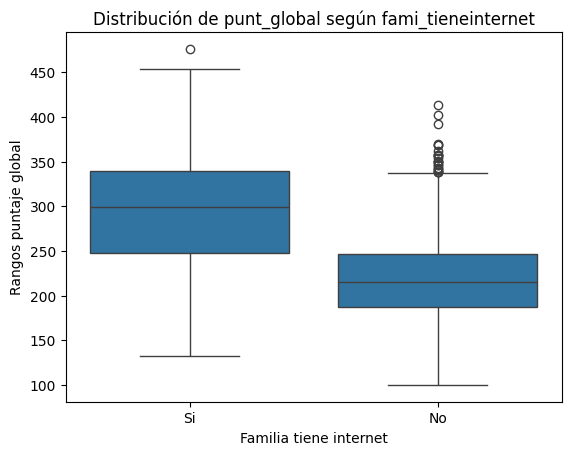

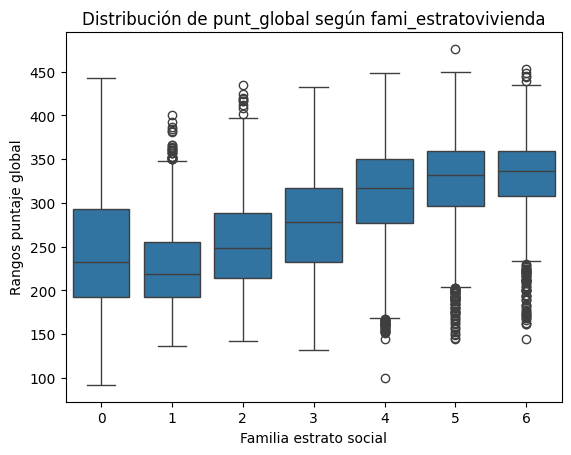

In [ ]:
sns.boxplot(x='fami_tieneinternet', y='punt_global', data=results_df)
plt.title('Distribución de punt_global según fami_tieneinternet')
plt.xlabel('Familia tiene internet')
plt.ylabel('Rangos puntaje global')
plt.show()

sns.boxplot(x='fami_estratovivienda', y='punt_global', data=results_df)
plt.title('Distribución de punt_global según fami_estratovivienda')
plt.xlabel('Familia estrato social')
plt.ylabel('Rangos puntaje global')
plt.show()

In [ ]:
print(results_df['punt_global_bin'])

0        200-300
1        200-300
2        200-300
3        100-200
4        300-400
          ...   
20044    200-300
20045    200-300
20046    300-400
20047    100-200
20048    200-300
Name: punt_global_bin, Length: 20049, dtype: category
Categories (5, object): ['0-100' < '100-200' < '200-300' < '300-400' < '400-500']


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# results_df["fami_estratovivienda"] = results_df["fami_estratovivienda"].str.extract(r"(\d+)").fillna(0).astype(int)

# Seleccionar variables
X = results_df[['fami_estratovivienda']]
y = results_df['punt_global_bin']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer to replace NaN with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on the training data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a LabelEncoder to convert categorical labels to numerical
label_encoder = LabelEncoder()

# Fit and transform the LabelEncoder on the training data
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Ajustar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
score = model.score(X_test, y_test)
print(f"R² Score: {score}")

R² Score: 0.24278996888628712


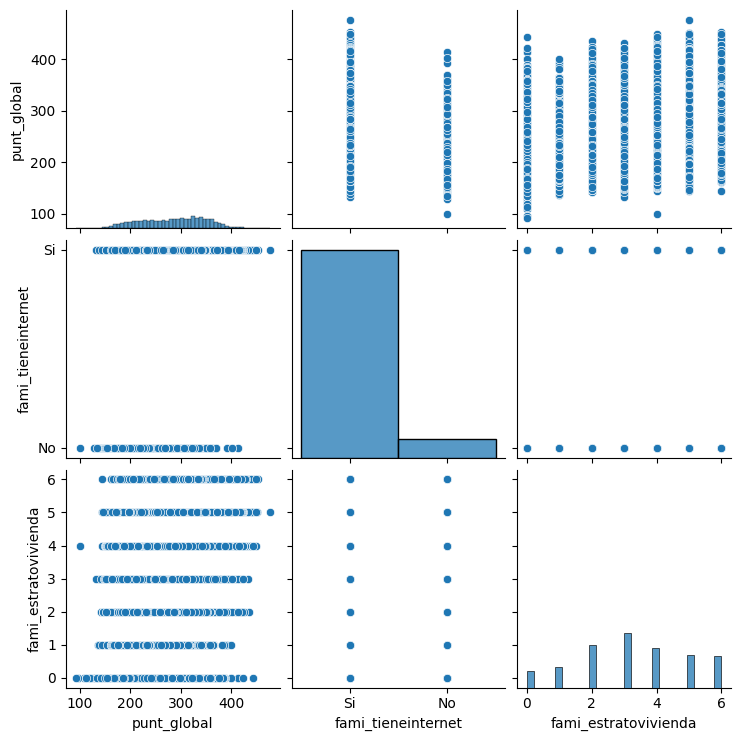

In [ ]:
sns.pairplot(results_df, vars=['punt_global', 'fami_tieneinternet', 'fami_estratovivienda'])
plt.show()